In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns


You should consider upgrading via the 'c:\users\mike\anaconda3\python.exe -m pip install --upgrade pip' command.


2. Load and prepare the dataset
Load the dataset into a DataFrame named df_data.
Drop the name column. This column is not a feature required by the model.
Create a DataFrame named X containing all the columns except the status.
Create a DataFrame named y containing the status.
3. Split the dataset into a training set and a test set
4. Create the model
Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none.
Fit the classifier to the data.
If the algorithm fails to converge, what can you change to fix that?

5. Calculate accuracy
Calculate and print the accuracy of the model on the test data.

6. L2 regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

7. Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.05. Plot a graph to show the accuracy of the test data versus the accuracy of the training data. Select an appropriate value for C and explain why that may be the best value.

In [6]:
df_data = pd.read_excel('parkinsons.data.xlsx')
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# dropping name variable from df
df_data.drop(['name'], axis=1, inplace=True)

In [8]:
#creating x and y for model
X = df_data.drop('status', axis = 1) 
y = df_data['status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# creating lr model
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4)
lr.fit(X, y)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

# model failed to converge after 100 iterations

accuracy score: 0.9230769230769231
# of iterations 100


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, random_state=4)
lr.fit(X, y)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

# after increasing 1000 iterations, model converged but accuracy is unchanged. 

accuracy score: 0.9230769230769231
# of iterations 936


In [13]:
#comparing model to test data
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4)
lr.fit(X, y)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# the model is underfit

accuracy score: 0.9230769230769231
# of iterations 100
Score on training data:  0.8525641025641025
Score on test data:  0.9230769230769231


C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
# looking at effects on model by L2 regularization

lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=2)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# using and L2 param, accuracy has increased and underfitting has improved. The range of coefficients is reduced
# from 0 to 4.5 without L2 to between -0.5 to 1.7 or from a about a 4 point spread to a 2 point spread.

Score on training data:  0.8525641025641025
Score on test data:  0.8974358974358975


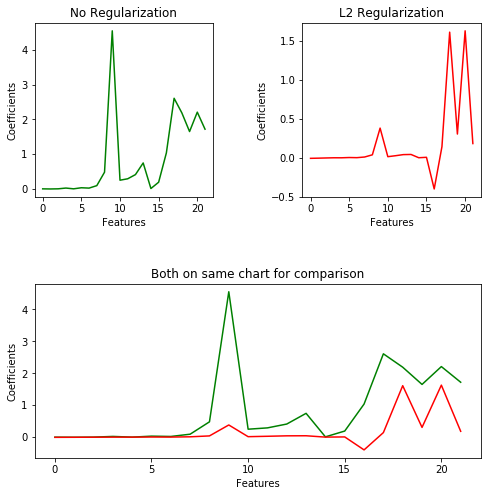

In [17]:
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(2, 2, hspace=0.5, wspace=0.5)


x = np.arange(0, len(lr.coef_[0]),1)
y = lr.coef_[0]
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(x, y, '-g')
ax1.set(xlabel='Features', ylabel='Coefficients')
ax1.set_title('No Regularization')

y_reg = lr_regularized.coef_[0]
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(x, y_reg, '-r')
ax2.set(xlabel='Features', ylabel='Coefficients')
ax2.set_title('L2 Regularization')

ax3 = fig.add_subplot(grid[1, 0:])
ax3.plot(x, y, '-g')
ax3.plot(x, y_reg, '-r')

ax3.set(xlabel='Features', ylabel='Coefficients')
ax3.set_title('Both on same chart for comparison')
plt.show()

L2 regularization Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

Choose the C parameter. Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.05. Plot a graph to show the accuracy of the test data versus the accuracy of the training data. Select an appropriate value for C and explain why that may be the best value.

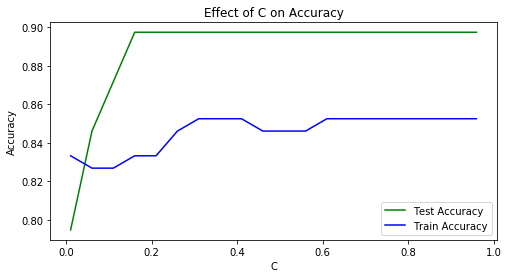

In [21]:
# looking at effect of various values of C on the model

c_vals = np.arange(0.01, 1.0, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

# The minimum value of C occurs at C = 0.01.